In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import h5py
drive.mount('/content/drive')
file_path="/content/drive/MyDrive/dataset_ts_light_version.hdf5"


Mounted at /content/drive


In [4]:
with h5py.File(file_path, 'r') as f:
  for key in f.keys():
    print(f"{key}: shape={f[key].shape}")

  X_train= f['x_train'][:]
  y_train= f['y_train'][:]

  X_val= f['x_validation'][:]
  y_val= f['y_validation'][:]

  X_test= f['x_test'][:]
  y_test= f['y_test'][:]

x_test: shape=(7766, 48, 48, 3)
x_train: shape=(90601, 48, 48, 3)
x_validation: shape=(31063, 48, 48, 3)
y_test: shape=(7766,)
y_train: shape=(90601,)
y_validation: shape=(31063,)


In [5]:
# seeing what the labels look like
y_train_df = pd.DataFrame(y_train)
y_val_df = pd.DataFrame(y_val)
y_test_df = pd.DataFrame(y_val)
y_train_df.head()
# as we can see, the labels are numeric, so we will have to match each number with the name of its respective traffic sign

,0
0,8
1,33
2,25
3,29
4,22


<BarContainer object of 43 artists>

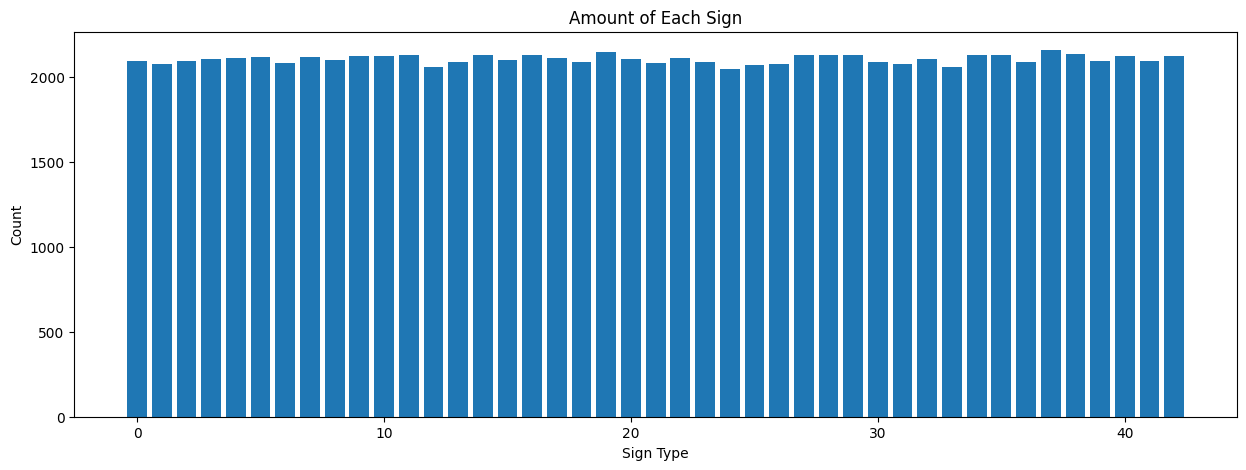

In [6]:
# Now, we make a boxplot of the amount of each label to make sure the amount of each is apprxoimately equal
signtypes = y_train_df[0].unique()
signcounts = [(signtype, y_train_df[y_train_df[0] == signtype].shape[0]) for signtype in signtypes]
#print(signcounts)
num, count = zip(*signcounts)
count = np.array(count)
plt.figure(figsize=(15,5))
plt.title("Amount of Each Sign")
plt.xlabel("Sign Type")
plt.ylabel("Count")
plt.bar(num, count)
# As we can see, each type of traffic sign appears a little over 2000 times.

8 - 120 kph speed limit  
33 - right turn arrow  
25 - road work  
29 - bicycles  
14 - stop signs  
17 - do not enter  